The Superstore dataset is a valuable resource for analyzing and understanding the dynamics of the retail industry. Its comprehensive nature, large size, and diverse variables make it an ideal dataset for studying sales performance, customer behavior, and market trends. By leveraging this dataset, researchers and analysts can gain valuable insights to drive business decisions and improve retail operations.

One of the key advantages of the Superstore dataset is its size and diversity. It encompasses several years' worth of data, allowing analysts to study long-term trends and patterns. Moreover, it covers a wide range of product categories, including office supplies, furniture, and technology, enabling researchers to explore different aspects of the retail industry.

The Superstore dataset is a comprehensive and widely-used dataset that contains sales data from a fictional retail company. It is often used by data analysts and researchers to analyze various aspects of retail operations, such as sales performance, customer behavior, and product trends.

Right now we gat a mission on This Dataset

firstly,
we are to carry out Recent Frequnecy from there we build a segementation of custumers and last carry out a salesprediction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
pwd

'C:\\Users\\HP'

In [3]:
df=pd.read_excel(r'C:\Users\HP\Downloads\vizwiz-superstore-europe\Sample - EU Superstore.xls')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10000 non-null  int64         
 1   Order ID        10000 non-null  object        
 2   Order Date      10000 non-null  datetime64[ns]
 3   Dispatch Date   10000 non-null  datetime64[ns]
 4   Delivery Mode   10000 non-null  object        
 5   Customer ID     10000 non-null  object        
 6   Customer Name   10000 non-null  object        
 7   Segment         10000 non-null  object        
 8   City            10000 non-null  object        
 9   State/Province  10000 non-null  object        
 10  Country/Region  10000 non-null  object        
 11  Region          10000 non-null  object        
 12  Product ID      10000 non-null  object        
 13  Category        10000 non-null  object        
 14  Sub-Category    10000 non-null  object        
 15  Pro

In [4]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


In [5]:
#viewin the table

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10000 non-null  int64         
 1   Order ID        10000 non-null  object        
 2   Order Date      10000 non-null  datetime64[ns]
 3   Dispatch Date   10000 non-null  datetime64[ns]
 4   Delivery Mode   10000 non-null  object        
 5   Customer ID     10000 non-null  object        
 6   Customer Name   10000 non-null  object        
 7   Segment         10000 non-null  object        
 8   City            10000 non-null  object        
 9   State/Province  10000 non-null  object        
 10  Country/Region  10000 non-null  object        
 11  Region          10000 non-null  object        
 12  Product ID      10000 non-null  object        
 13  Category        10000 non-null  object        
 14  Sub-Category    10000 non-null  object        
 15  Pro

In [6]:
#good we gat The Date in proper format
#let import the Date

from datetime import datetime


df['Recency'] = (datetime.now().date() - df['Order Date'].dt.date).dt.days

#The recency columns we Created will tells us the lastime the custumer paronize our stores

In [7]:
df['Recency']

0        238
1        238
2        238
3        238
4        238
        ... 
9995    1051
9996     981
9997     981
9998     981
9999     981
Name: Recency, Length: 10000, dtype: int64

In [8]:
#checking the Uniqueness

df['Recency'].unique()

array([ 238,  792,  835, ...,  516,  881, 1252], dtype=int64)

In [9]:
#counting the recency and renaming the columns name

df['Recency'].value_counts().sort_values(ascending=True)[:10].to_frame().reset_index().rename(columns={'index':'Days','Recency':'Recent_Count'})

,Days,Recent_Count
0,1252,1
1,78,1
2,529,1
3,1295,1
4,150,1
5,1156,1
6,1255,1
7,274,1
8,857,1
9,314,1


In [10]:
#Using the custumer Id to get the count of the order ID.


freq_df = df.groupby('Customer ID')['Order ID'].count().reset_index()

In [11]:
#we creae a variable for it and reset the index

freq_df=freq_df.reset_index()

freq_df

,index,Customer ID,Order ID
0,0,AA-10315,16
1,1,AA-10375,7
2,2,AA-10480,10
3,3,AA-10645,16
4,4,AB-10015,24
...,...,...,...
790,790,XP-21865,6
791,791,YC-21895,29
792,792,YS-21880,12
793,793,ZC-21910,27


In [12]:
#rename the columns of the new varaible 

freq_df.rename(columns={'OrderID': 'Frequency'}, inplace=True)

In [13]:
#reset the Index, so as it will enable us to join

freqq_df=freq_df.reset_index()

In [14]:
#we create a new variable name called monoet_df by geting to sum up the total of eacch custumer have spent.

money_df = df.groupby('Customer ID')['Sales'].sum().reset_index()

money_df=money_df.reset_index()

money_df

,index,Customer ID,Sales
0,0,AA-10315,6105.6270
1,1,AA-10375,560.0820
2,2,AA-10480,5254.4565
3,3,AA-10645,2730.2070
4,4,AB-10015,6116.4540
...,...,...,...
790,790,XP-21865,2113.4580
791,791,YC-21895,8530.9185
792,792,YS-21880,3864.0600
793,793,ZC-21910,11853.0690


In [15]:
#reset the index, so it will enable us to join

fred_df=freq_df.reset_index()

fred_df

,level_0,index,Customer ID,Order ID
0,0,0,AA-10315,16
1,1,1,AA-10375,7
2,2,2,AA-10480,10
3,3,3,AA-10645,16
4,4,4,AB-10015,24
...,...,...,...,...
790,790,790,XP-21865,6
791,791,791,YC-21895,29
792,792,792,YS-21880,12
793,793,793,ZC-21910,27


In [16]:
#then we Joining

dframe=freq_df.merge(money_df,how='left')

dframe

,index,Customer ID,Order ID,Sales
0,0,AA-10315,16,6105.6270
1,1,AA-10375,7,560.0820
2,2,AA-10480,10,5254.4565
3,3,AA-10645,16,2730.2070
4,4,AB-10015,24,6116.4540
...,...,...,...,...
790,790,XP-21865,6,2113.4580
791,791,YC-21895,29,8530.9185
792,792,YS-21880,12,3864.0600
793,793,ZC-21910,27,11853.0690


In [17]:
#droppping the index columns

dframe=dframe.drop(['index'],axis=1)

dframe

,Customer ID,Order ID,Sales
0,AA-10315,16,6105.6270
1,AA-10375,7,560.0820
2,AA-10480,10,5254.4565
3,AA-10645,16,2730.2070
4,AB-10015,24,6116.4540
...,...,...,...
790,XP-21865,6,2113.4580
791,YC-21895,29,8530.9185
792,YS-21880,12,3864.0600
793,ZC-21910,27,11853.0690


In [18]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238


In [19]:
#checking the statistcal summary of recency to measure the values


df['Recency'].describe()

count    10000.000000
mean       506.203000
std        411.496585
min        -89.000000
25%        122.000000
50%        451.000000
75%        825.000000
max       1371.000000
Name: Recency, dtype: float64

In [20]:
dframe

,Customer ID,Order ID,Sales
0,AA-10315,16,6105.6270
1,AA-10375,7,560.0820
2,AA-10480,10,5254.4565
3,AA-10645,16,2730.2070
4,AB-10015,24,6116.4540
...,...,...,...
790,XP-21865,6,2113.4580
791,YC-21895,29,8530.9185
792,YS-21880,12,3864.0600
793,ZC-21910,27,11853.0690


In [21]:
dframe=dframe.rename(columns={'Order ID':'Frequency_Count'})

dframe

,Customer ID,Frequency_Count,Sales
0,AA-10315,16,6105.6270
1,AA-10375,7,560.0820
2,AA-10480,10,5254.4565
3,AA-10645,16,2730.2070
4,AB-10015,24,6116.4540
...,...,...,...
790,XP-21865,6,2113.4580
791,YC-21895,29,8530.9185
792,YS-21880,12,3864.0600
793,ZC-21910,27,11853.0690


In [22]:
#checking the uniqueness

dframe['Frequency_Count'].unique()

array([16,  7, 10, 24, 13, 22,  9,  8,  6, 11, 26, 14, 20, 12, 17,  2, 18,
       21, 23,  5, 25, 15, 37,  3, 19,  4,  1, 30, 28, 31, 35, 27, 32, 33,
       34, 29], dtype=int64)

In [23]:
#checking the differences between maximum and minimum

np.ptp(dframe['Sales'])

16540.743

In [24]:
#checking for the Sales statistical Summary

dframe['Sales'].describe()

count      795.000000
mean      3695.709511
std       2406.582656
min         23.400000
25%       1767.935250
50%       3264.978000
75%       5057.616000
max      16564.143000
Name: Sales, dtype: float64

In [25]:
#Defining The criteriat base on their Frequency

def freq(X):
    if X >= 30:
        return 'Champion'
    elif X >= 20 and X < 30:
        return 'Loyalist'
    elif X >= 12 and X < 20:
        return 'Regular'
    elif X >= 7 and X < 12:
        return 'Usual'
    elif X >= 3 and X < 7:
        return 'Ordinary'
    else:
        return 'Custumers'

In [26]:
#appliying the function we created

dframe['Freq_Score']=dframe['Frequency_Count'].apply(freq)

In [27]:
dframe

,Customer ID,Frequency_Count,Sales,Freq_Score
0,AA-10315,16,6105.6270,Regular
1,AA-10375,7,560.0820,Usual
2,AA-10480,10,5254.4565,Usual
3,AA-10645,16,2730.2070,Regular
4,AB-10015,24,6116.4540,Loyalist
...,...,...,...,...
790,XP-21865,6,2113.4580,Ordinary
791,YC-21895,29,8530.9185,Loyalist
792,YS-21880,12,3864.0600,Regular
793,ZC-21910,27,11853.0690,Loyalist


In [28]:
#counting

dframe['Freq_Score'].value_counts()

Regular      310
Usual        266
Loyalist      98
Ordinary      96
Custumers     16
Champion       9
Name: Freq_Score, dtype: int64

In [29]:
#checking for the top Five City

df['City'].value_counts().to_frame()[:5]

,City
London,257
Berlin,217
Vienna,202
Paris,187
Madrid,171


In [30]:
#City with the top sales 

df[['Sales','Customer ID','City']].groupby(['Customer ID','City']).sum().sort_values('Sales',ascending=False)[:10]

,,Sales
Customer ID,City,
PJ-18835,Prato,7958.580
SP-20920,Bochum,7629.111
DL-13315,Villach,7383.810
GT-14710,Huddersfield,7048.728
ER-13855,Lugo,6974.406
LB-16795,Edinburgh,6703.140
ML-17395,Valladolid,6573.732
HG-14845,Lille,6285.609
JG-15160,Stockport,6182.550


In [31]:
#checking for the total Amount each custmer have spent

dframe[['Sales','Customer ID','Freq_Score']].groupby(['Customer ID','Freq_Score']).sum().sort_values('Sales',ascending=False)[:10]

,,Sales
Customer ID,Freq_Score,
SP-20920,Champion,16564.1430
DL-13315,Loyalist,13192.7145
PO-18865,Regular,13056.2970
ZC-21910,Loyalist,11853.0690
JH-15820,Loyalist,11727.2925
MR-17545,Champion,11500.3755
GT-14710,Regular,11429.5080
CM-11830,Champion,11302.1535
DJ-13420,Loyalist,11159.4420


In [32]:
 df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238


In [33]:
#displayiing the full stack of the columns


pd.set_option('Display.max_columns',21)

In [34]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238


In [35]:
#checking the data type of the dispatch Date

type(df['Dispatch Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
#creating columns for Processing Date

df['Processing_days']=df['Dispatch Date']-df['Order Date']

In [37]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Processing_days
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238,4 days
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238,4 days
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238,4 days
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238,4 days
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238,4 days


In [38]:
df['Processing_days']

0      4 days
1      4 days
2      4 days
3      4 days
4      4 days
        ...  
9995   3 days
9996   4 days
9997   4 days
9998   4 days
9999   4 days
Name: Processing_days, Length: 10000, dtype: timedelta64[ns]

In [39]:
#do we have Zero days of processing ?


Zero_days=df.query('Processing_days=="0 Days"')

In [40]:
Zero_days['City'].value_counts()[:5]

Madrid       19
Paris        16
Vienna       13
Hamburg      12
Stockholm    12
Name: City, dtype: int64

In [41]:
Zero_days['Delivery Mode'].value_counts()

Same Day    494
Name: Delivery Mode, dtype: int64

One can easily Say madrid I the Homebase of the company. 

In [42]:
#let check for the day 1

day_one=df.query('Processing_days=="1 days"')

In [43]:
#Day One in the processing_days by City

day_one['City'].value_counts()[:5]

Paris       17
London      13
Madrid       9
Lunel        7
Bordeaux     7
Name: City, dtype: int64

In [44]:
day_one['Delivery Mode'].value_counts()

First Class     294
Same Day         22
Second Class      3
Name: Delivery Mode, dtype: int64

day One Paris Come FIrst 

In [45]:
#Day Two in the processing_days by City


day_two=df.query('Processing_days=="2 days"')

day_two['City'].value_counts()[:5]

London    35
Vienna    27
Madrid    26
Rome      22
Berlin    20
Name: City, dtype: int64

In [46]:
 #Day Three in the processing_days by City

day_three=df.query('Processing_days=="3 days"')

day_three['City'].value_counts()[:5]

London    25
Vienna    24
Paris     19
Madrid    18
Berlin    18
Name: City, dtype: int64

In [47]:
#Day four in the Processing by city

day_four=df.query('Processing_days=="4 days"')


day_four['City'].value_counts()[:5]

London    60
Madrid    57
Berlin    54
Paris     52
Vienna    52
Name: City, dtype: int64

London is one of the City where we the company gat majority of their Customers.

In [48]:
#Top Five city where most by order

df['City'].value_counts()[:5]

London    257
Berlin    217
Vienna    202
Paris     187
Madrid    171
Name: City, dtype: int64

In [49]:
#top product 

dframe

,Customer ID,Frequency_Count,Sales,Freq_Score
0,AA-10315,16,6105.6270,Regular
1,AA-10375,7,560.0820,Usual
2,AA-10480,10,5254.4565,Usual
3,AA-10645,16,2730.2070,Regular
4,AB-10015,24,6116.4540,Loyalist
...,...,...,...,...
790,XP-21865,6,2113.4580,Ordinary
791,YC-21895,29,8530.9185,Loyalist
792,YS-21880,12,3864.0600,Regular
793,ZC-21910,27,11853.0690,Loyalist


In [50]:
#Summing up of very individual sales


dframe[['Sales','Customer ID']].groupby(['Customer ID']).sum().sort_values('Sales',ascending=False)

,Sales
Customer ID,
SP-20920,16564.1430
DL-13315,13192.7145
PO-18865,13056.2970
ZC-21910,11853.0690
JH-15820,11727.2925
...,...
RB-19435,92.8350
AR-10540,63.8670
CC-12430,57.1200


In [51]:
#checking the uniquenss

dframe['Sales'].unique()

array([ 6105.627 ,   560.082 ,  5254.4565,  2730.207 ,  6116.454 ,
        3343.296 ,  2950.398 ,  9138.762 ,  6434.433 ,   950.595 ,
        4277.865 ,  1033.278 ,  2294.91  ,  2738.22  ,  2233.644 ,
        1000.8885,  7807.338 ,  5881.68  ,  1661.91  ,  6070.938 ,
        3589.5405,  2645.472 ,  7460.6025,  4071.609 ,  2285.031 ,
        2158.572 ,  3109.1895,  3972.834 ,  4524.624 ,  3590.691 ,
        1830.93  ,  7417.7385,   250.668 ,  1615.485 ,  3513.558 ,
        2104.914 ,  3897.4875,  2248.506 ,  3401.121 ,  4502.0145,
        8941.752 ,  6094.653 ,  5655.996 ,  1762.83  ,  1434.6945,
        7039.644 ,  3530.013 ,  6532.68  ,    63.867 ,  1899.006 ,
        7719.3   ,  6710.409 ,  4138.902 ,  2472.831 ,  6300.594 ,
        3689.523 ,  4994.8035,  1454.961 ,  6343.248 ,  4359.993 ,
        4838.574 ,  4066.104 ,  3022.908 ,  1286.883 ,  1808.856 ,
        6600.672 ,  6940.431 ,  3189.321 ,  2532.8895,  5214.09  ,
        1268.136 ,  2491.884 ,  4688.712 ,  1417.4385,  3542.4

In [52]:
#sale desciption

dframe['Sales'].describe()

count      795.000000
mean      3695.709511
std       2406.582656
min         23.400000
25%       1767.935250
50%       3264.978000
75%       5057.616000
max      16564.143000
Name: Sales, dtype: float64

In [53]:
#the main varibale statical summary

df['Sales'].describe()

count    10000.000000
mean       293.808906
std        486.055635
min          2.955000
25%         49.462500
50%        119.355000
75%        320.708625
max       7958.580000
Name: Sales, dtype: float64

In [54]:
#definng The citeriat of our Custumers base on their Order of purchase

def criteriat(X):
    if X >= 15000:
        return 'Gold Members'
    elif X >=10000 and X < 15000:
        return 'Vip Shoppers'
    elif X >=5000 and X < 10000:
        return 'Premium Custumers'
    elif X >=2500 and X < 5000:
        return 'Standard Custumers'
    elif X >= 1000 and X < 2500:
        return 'Exclusive Custumer'
    elif X >=500 and X < 1000:
        return 'Prime_Member'
    else:
        return 'Free_Custumers'

In [55]:
#Applying The function

dframe['Custumer_segementation']=dframe['Sales'].apply(criteriat)

In [56]:
dframe

,Customer ID,Frequency_Count,Sales,Freq_Score,Custumer_segementation
0,AA-10315,16,6105.6270,Regular,Premium Custumers
1,AA-10375,7,560.0820,Usual,Prime_Member
2,AA-10480,10,5254.4565,Usual,Premium Custumers
3,AA-10645,16,2730.2070,Regular,Standard Custumers
4,AB-10015,24,6116.4540,Loyalist,Premium Custumers
...,...,...,...,...,...
790,XP-21865,6,2113.4580,Ordinary,Exclusive Custumer
791,YC-21895,29,8530.9185,Loyalist,Premium Custumers
792,YS-21880,12,3864.0600,Regular,Standard Custumers
793,ZC-21910,27,11853.0690,Loyalist,Vip Shoppers


In [57]:
print('Custumer Segmentation :\n',format(dframe['Custumer_segementation'].value_counts()))
print('*'*127)
print('Custumer Frequnency :\n',format(dframe['Freq_Score'].value_counts()))

Custumer Segmentation :
 Standard Custumers    299
Exclusive Custumer    217
Premium Custumers     191
Prime_Member           52
Free_Custumers         23
Vip Shoppers           12
Gold Members            1
Name: Custumer_segementation, dtype: int64
*******************************************************************************************************************************
Custumer Frequnency :
 Regular      310
Usual        266
Loyalist      98
Ordinary      96
Custumers     16
Champion       9
Name: Freq_Score, dtype: int64


In [58]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Processing_days
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238,4 days
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238,4 days
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238,4 days
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238,4 days
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238,4 days


In [59]:
#Let see their daily sales


ndf=df.set_index('Order Date')

ndf

,Row ID,Order ID,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Processing_days
Order Date,,,,,,,,,,,,,,,,,,,,,
2023-02-07,1,ES-2023-1311038,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238,4 days
2023-02-07,2,ES-2023-1311038,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238,4 days
2023-02-07,3,ES-2023-1311038,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238,4 days
2023-02-07,4,ES-2023-1311038,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238,4 days
2023-02-07,5,ES-2023-1311038,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,9996,ES-2020-3780358,2020-11-19,First Class,CC-12100,Chad Cunningham,Home Office,Rovigo,Veneto,Italy,South,OFF-BI-10000346,Office Supplies,Binders,"Ibico 3-Hole Punch, Clear",59.82,2,0.0,23.88,1051,3 days
2021-01-25,9997,ES-2021-5371207,2021-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,Germany,Central,OFF-BI-10002083,Office Supplies,Binders,"Acco Hole Reinforcements, Economy",6.66,1,0.0,0.57,981,4 days
2021-01-25,9998,ES-2021-5371207,2021-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,Germany,Central,OFF-SU-10003211,Office Supplies,Supplies,"Acme Ruler, Steel",96.66,6,0.0,28.98,981,4 days


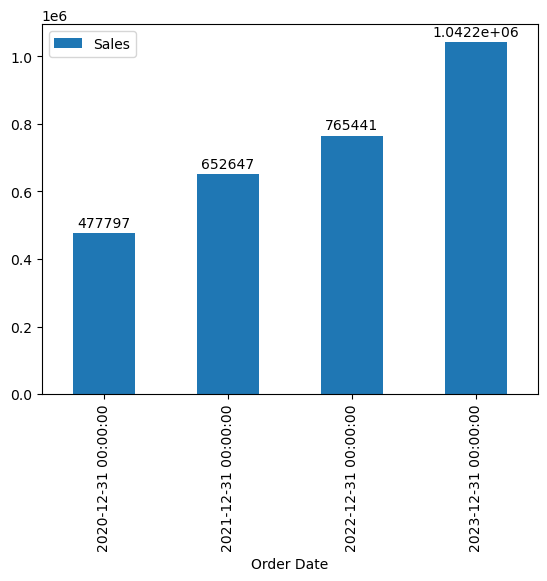

In [60]:
#Yearly Sales

fig=(ndf.loc[:,['Sales']].resample('Y').sum().plot(kind='bar'))

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2,fmt='%g')

In [61]:
#monthly Sales 


(ndf.loc[:,['Sales']].resample('M').sum())#.plot(kind='bar')).style_highlight()

,Sales
Order Date,
2020-01-31,18603.7125
2020-02-29,22635.9075
2020-03-31,17926.0350
2020-04-30,30133.1250
2020-05-31,30502.1685
2020-06-30,54356.2995
2020-07-31,18318.9570
2020-08-31,55139.1405
2020-09-30,72665.3310


#Good sales Was 2023-08-31
#better Sales of the Year was 2023.

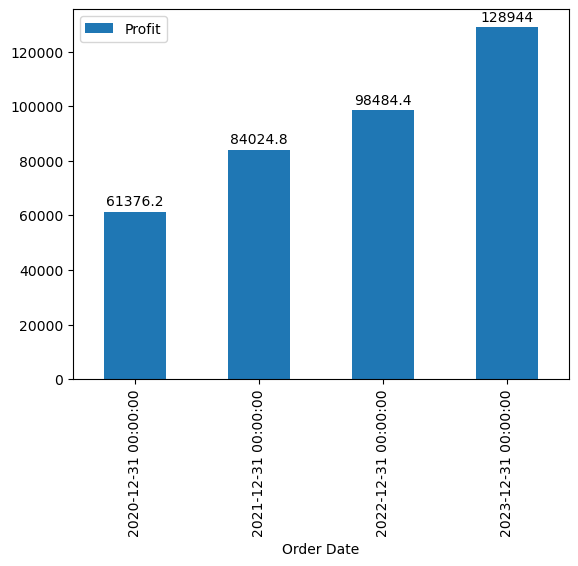

In [62]:
#having done sales let do profit


fig=(ndf.loc[:,['Profit']].resample('Y').sum().plot(kind='bar'))

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2,fmt='%g')

In [63]:
#having done sales let do profit


(ndf.loc[:,['Profit']].resample('M').sum())#.plot(kind='bar'))


,Profit
Order Date,
2020-01-31,631.4625
2020-02-29,999.2475
2020-03-31,3234.8550
2020-04-30,4102.5750
2020-05-31,2061.6885
2020-06-30,7778.3295
2020-07-31,1993.0470
2020-08-31,7083.6705
2020-09-30,14503.5510


till 2023 we gat the top profit.

but in monthly profit the best month profit is September.

In [64]:
df['Discount'].unique()

array([0.  , 0.1 , 0.15, 0.4 , 0.5 , 0.6 , 0.35, 0.2 , 0.3 , 0.45, 0.85,
       0.65, 0.7 , 0.8 ])

In [65]:
#in which type of product They give discount


df.query('Discount==0.85')

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Processing_days
1704,1390,IT-2021-2675422,2021-06-01,2021-06-03,Second Class,BF-11215,Benjamin Farhat,Home Office,Hanover,Lower Saxony,...,FUR-TA-10003963,Furniture,Tables,"Bevis Conference Table, Fully Assembled",555.138,4,0.85,-1924.542,854,2 days
3296,6645,IT-2021-5588535,2021-11-17,2021-11-22,Standard Class,MW-18235,Mitch Willingham,Corporate,Hanover,Lower Saxony,...,FUR-TA-10004544,Furniture,Tables,"Chromcraft Coffee Table, Fully Assembled",241.704,6,0.85,-1144.116,685,5 days


Only Two Itemm ehich are Funiture and take a of 0.85% discount.

In [66]:
#which year is That

ndf.query('Discount==0.65')

,Row ID,Order ID,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Processing_days
Order Date,,,,,,,,,,,,,,,,,,,,,
2022-08-20,1765,IT-2022-1770521,2022-08-27,Standard Class,TN-21040,Tanja Norvell,Home Office,Le Mans,Pays de la Loire,France,Central,TEC-CO-10004138,Technology,Copiers,"Sharp Wireless Fax, Digital",248.8920,2,0.65,-433.7880,409,7 days
2023-08-13,1834,IT-2023-4483445,2023-08-17,Standard Class,AG-10495,Andrew Gjertsen,Corporate,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Central,TEC-MA-10002686,Technology,Machines,"Okidata Card Printer, White",304.9200,5,0.65,-270.1800,51,4 days
2023-06-18,2086,IT-2023-4142742,2023-06-23,Second Class,DW-13585,Dorothy Wardle,Corporate,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Central,TEC-PH-10003492,Technology,Phones,"Cisco Audio Dock, Full Size",192.5280,3,0.65,-275.1120,107,5 days
2021-11-13,2335,IT-2021-5541817,2021-11-17,Standard Class,DA-13450,Dianna Arnett,Home Office,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Central,TEC-MA-10004655,Technology,Machines,"Konica Receipt Printer, White",84.4620,2,0.65,-74.8380,689,4 days
2022-06-19,2390,ES-2022-4250728,2022-06-22,Second Class,JG-15805,John Grady,Corporate,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Central,TEC-CO-10002423,Technology,Copiers,"Canon Personal Copier, High-Speed",591.9480,12,0.65,-642.8520,471,3 days
2023-02-26,3665,IT-2023-5268305,2023-03-04,Standard Class,RK-19300,Ralph Kennedy,Consumer,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Central,TEC-CO-10004034,Technology,Copiers,"Canon Fax Machine, High-Speed",332.4195,3,0.65,-503.4105,219,6 days
2021-12-23,3875,IT-2021-4790620,2021-12-25,Second Class,MG-17680,Maureen Gastineau,Home Office,Le Mans,Pays de la Loire,France,Central,TEC-CO-10000013,Technology,Copiers,"Brother Fax Machine, Laser",780.4230,7,0.65,-535.2270,649,2 days
2021-06-20,4319,IT-2021-1191900,2021-06-26,Standard Class,JD-16060,Julia Dunbar,Consumer,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Central,TEC-PH-10001574,Technology,Phones,"Nokia Audio Dock, Cordless",118.7130,2,0.65,-152.6670,835,6 days
2020-02-02,6258,IT-2020-1877466,2020-02-06,Standard Class,EH-14185,Evan Henry,Consumer,Reims,Alsace-Champagne-Ardenne-Lorraine,France,Central,TEC-CO-10000660,Technology,Copiers,"Hewlett Copy Machine, Color",549.9270,6,0.65,-235.7730,1339,4 days


Technology sub_catgeory product is The Only One with 0.65% category this Dicount happen in all of the years.

moving to ML

In [67]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Processing_days
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238,4 days
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238,4 days
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238,4 days
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238,4 days
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238,4 days


<AxesSubplot:>

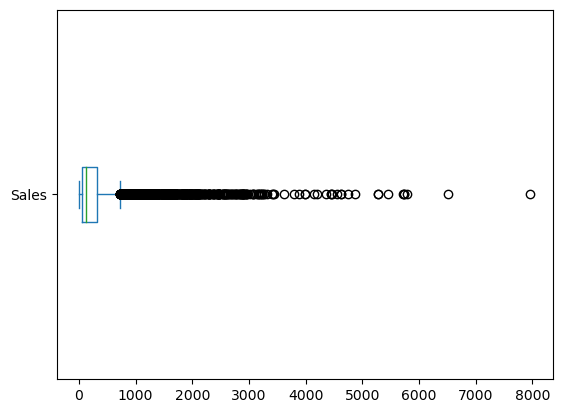

In [68]:
df['Sales'].plot.box(vert=False)

In [69]:
df['Sales_scores']=pd.cut(x=df['Sales'],bins=[-np.infty,1000,5000,np.infty],labels=['Low','Medium','High'])

In [70]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Processing_days,Sales_scores
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,238,4 days,Low
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,238,4 days,Low
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,238,4 days,Low
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,238,4 days,Low
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,238,4 days,Low


<AxesSubplot:xlabel='Order Date'>

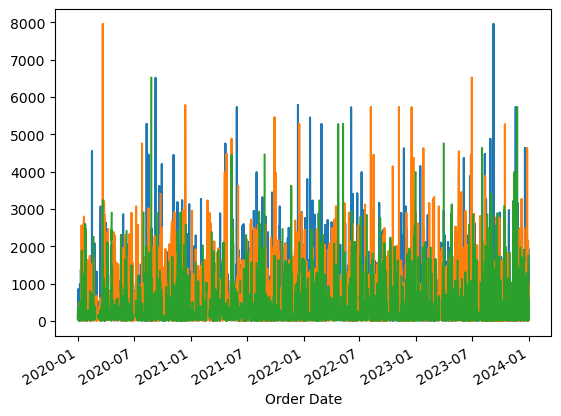

In [71]:
#plottting to see trend of the sales.

ndf['Sales'].plot()
ndf['Sales'].shift(500).plot()
ndf['Sales'].shift(5000).plot()

In [73]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


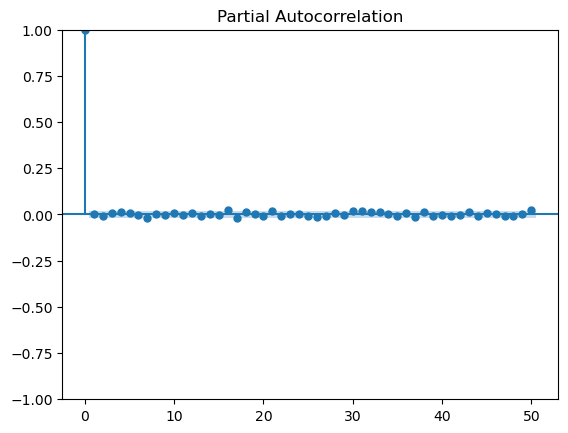

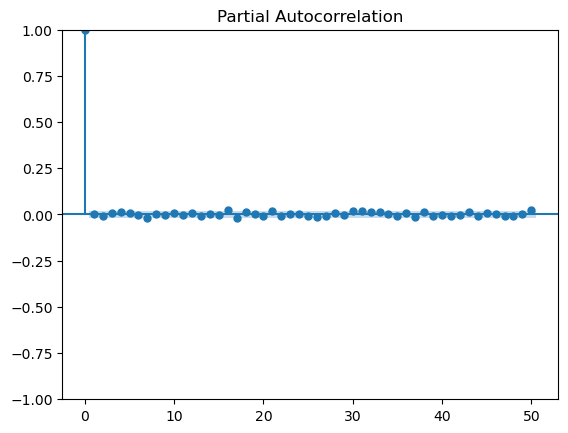

In [74]:
plot_pacf(ndf['Sales'],lags=50)

Every weak Correlation

In [76]:
#we are going to be using the Monthly Sales

data=ndf.loc[:,['Sales']].resample('M').sum()

data

,Sales
Order Date,
2020-01-31,18603.7125
2020-02-29,22635.9075
2020-03-31,17926.0350
2020-04-30,30133.1250
2020-05-31,30502.1685
2020-06-30,54356.2995
2020-07-31,18318.9570
2020-08-31,55139.1405
2020-09-30,72665.3310


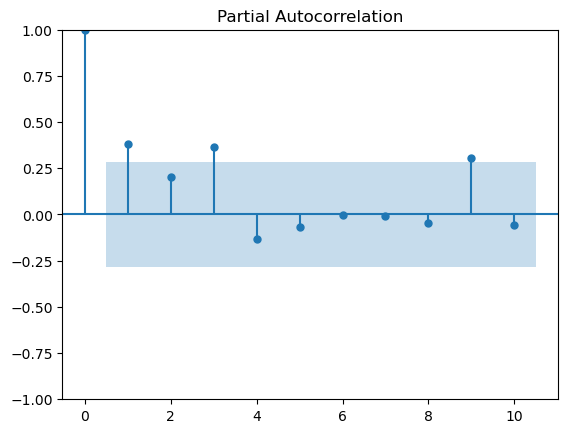

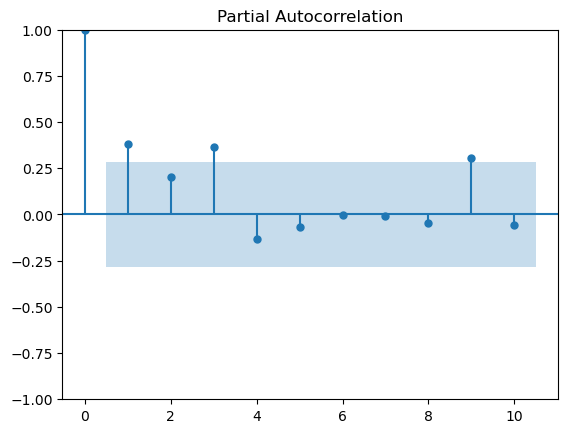

In [78]:
plot_pacf(data['Sales'],lags=10)

This Clearly show that The Mean This data is non-stationary.


We clearly going to be using SARIMA model.

<AxesSubplot:xlabel='Order Date'>

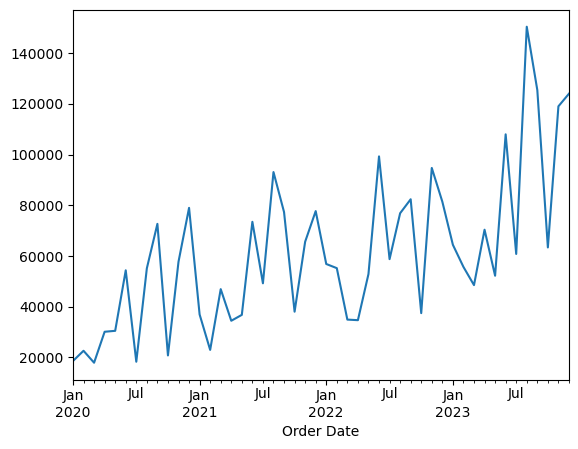

In [79]:
data['Sales'].plot()

In [80]:
ndf.index.year

Int64Index([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2021, 2021, 2021,
            ...
            2023, 2023, 2023, 2022, 2023, 2020, 2021, 2021, 2021, 2021],
           dtype='int64', name='Order Date', length=10000)

In [81]:
ndf.index

DatetimeIndex(['2023-02-07', '2023-02-07', '2023-02-07', '2023-02-07',
               '2023-02-07', '2023-02-07', '2023-02-07', '2021-08-02',
               '2021-08-02', '2021-08-02',
               ...
               '2023-02-07', '2023-09-17', '2023-04-14', '2022-07-02',
               '2023-11-24', '2020-11-16', '2021-01-25', '2021-01-25',
               '2021-01-25', '2021-01-25'],
              dtype='datetime64[ns]', name='Order Date', length=10000, freq=None)

Text(0.5, 1.0, 'Train & Test')

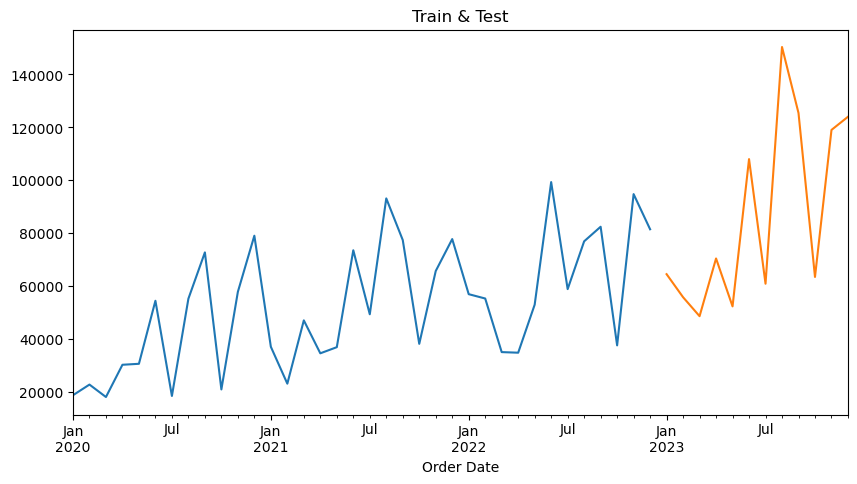

In [82]:
#pick a date then decide to used the date to split the data to train and test using loc then i plot it out

split_date='2023-01-01'
train=data['Sales'].loc[:split_date]
test=data['Sales'].loc[split_date:]
train.plot(figsize=(10,5))
test.plot()
plt.title('Train & Test')

In [83]:
#imported the Sarima model

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
#i instanciate and fill in the necessary parameter,
#then i ave to set the disp to 0

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
model_fit = model.fit(disp=0) 

In [85]:
#i created the varaible of the lenght of test and so to used it to forcast the tested varible

fcast_len = len(test) 
fcast = model_fit.forecast(fcast_len)
predict=fcast[0]

In [86]:
#importing the Metrics, is nothing differnet from linear_regression

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [88]:
#The Mean_Absolute error ,mean_square_error

mae = mean_absolute_error(test, fcast)
mse = mean_squared_error(test, fcast)
rmse = np.sqrt(mse)

Mean Squared Error: 932509486.8612038
Root Mean Squared Error: 30537.01830338391
Mean Absolute Error: 23188.076488327133


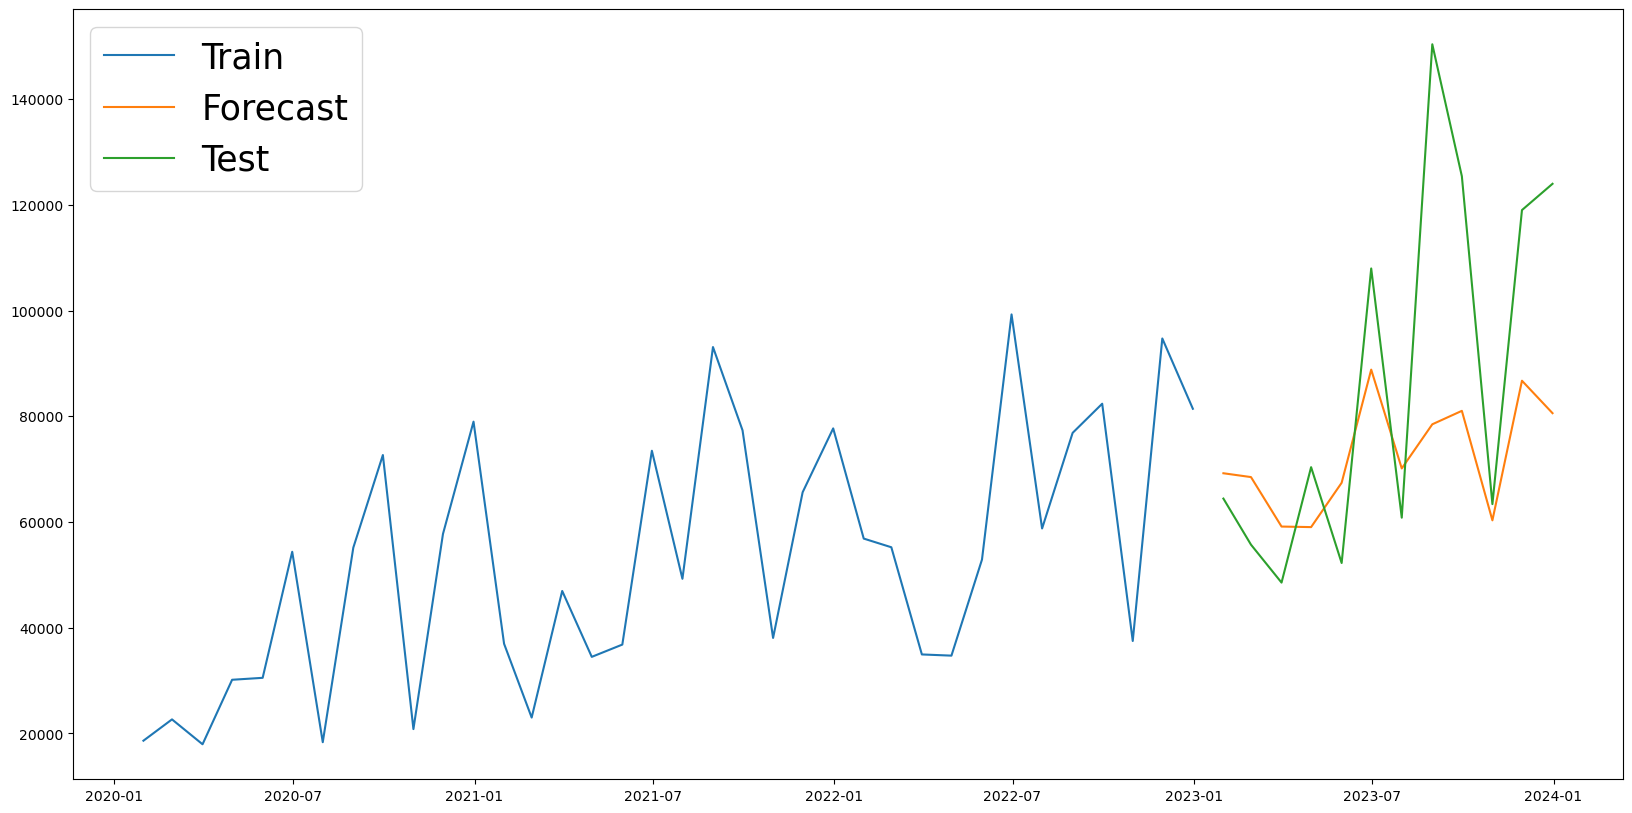

In [89]:
#Setting up the label and the plotting the training, tetsing and forecasting

plt.figure(figsize=(20, 10))
plt.plot(train, label='Train')
plt.plot(fcast, label='Forecast')
plt.plot(test, label='Test')

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
plt.legend(fontsize=25)

In [90]:
#Creating a data frame for the prediction vaue and actual Value

pd.DataFrame({'Actual_value':test,'Predict_Values':fcast})

,Actual_value,Predict_Values
2023-01-31,64420.2705,69213.734020
2023-02-28,55698.6795,68489.405242
2023-03-31,48521.7360,59127.745700
2023-04-30,70365.2205,59023.393289
2023-05-31,52229.4810,67412.191665
2023-06-30,107968.6245,88825.069205
2023-07-31,60806.4795,70130.187125
2023-08-31,150393.4800,78479.951188
2023-09-30,125416.6890,81025.723621
2023-10-31,63374.1495,60303.198927


The Errorrate  is Large, and we see that it is close but not totally accurate. Visually, when you compare the test data to the predicted values, they are off quite a bit. But when you zoom out to the training data it seems to be an acceptable prediction because of the variation in trends throughtout the years.
and Mind you there always a spike up in Seasonal sales so definitely we can't get accurate prediction of the sales but close.